<a href="https://colab.research.google.com/github/Ma9si/DeepLearningProject/blob/main/ClassificationByMansi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Pneumonothorax



/content/drive/MyDrive/Pneumonothorax


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Pneumonothorax"

In [ ]:
# !kaggle datasets download -d volodymyrgavrysh/pneumothorax-binary-classification-task

In [ ]:
# !unzip *.zip

In [10]:
import pandas as pd
import numpy as np
import os
Dataset = pd.read_csv("/content/drive/MyDrive/Pneumonothorax/small_train_data_set/train_data.csv")    # Dataframe

In [11]:
dataset = Dataset[["file_name","target"]]

In [12]:
dataset["file_name"] = "/content/drive/MyDrive/Pneumonothorax/small_train_data_set/small_train_data_set" + dataset["file_name"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
dataset.head()

file_name  target
0  /content/drive/MyDrive/Pneumonothorax/small_tr...       1
1  /content/drive/MyDrive/Pneumonothorax/small_tr...       1
2  /content/drive/MyDrive/Pneumonothorax/small_tr...       1
3  /content/drive/MyDrive/Pneumonothorax/small_tr...       1
4  /content/drive/MyDrive/Pneumonothorax/small_tr...       1

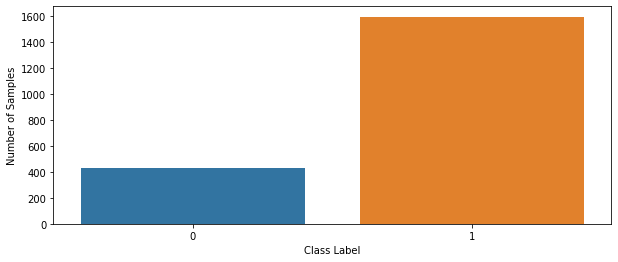

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 4))                                # Setting Figure Size
sns.countplot(x ='target', data=dataset)                                  # Creating Seaborn Count Plot
plt.xlabel("Class Label")                                                # X-Label of the plot
plt.ylabel("Number of Samples")                                          # Y-Label of the plot
plt.show() 

In [26]:
Dataset["target"] = Dataset["target"].astype("str")

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Data_train, Data_test = train_test_split(Dataset, test_size=0.2) 

In [29]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
import random

random_image = random.sample(os.listdir("/content/drive/MyDrive/Pneumonothorax/small_train_data_set/small_train_data_set"), 1)
image = plt.imread("/content/drive/MyDrive/Pneumonothorax/small_train_data_set/small_train_data_set" + "/" + random_image[0])
print(image.shape)
print("Max: ", image.max()) 
print("Min: " ,image.min())

(1024, 1024)
Max:  0.89411765
Min:  0.039215688


In [31]:
datagen = ImageDataGenerator()

In [32]:
dataset["target"] = dataset["target"].astype("str")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
train_gen=datagen.flow_from_dataframe(dataframe = Data_train, 
                                      directory= "/content/drive/MyDrive/Pneumonothorax/small_train_data_set/small_train_data_set/",# Training Dataframe
                                      batch_size=20,                    # Size of Batch
                                      class_mode="binary",         # Type of Labels
                                      x_col="file_name",               # Input Column
                                      color_mode="rgb",                 # Image Format
                                      y_col="target",                    # Target Column
                                      target_size=(1024, 1024))

Found 1621 validated image filenames belonging to 2 classes.


In [37]:
test_gen=datagen.flow_from_dataframe(dataframe = Data_test, 
                                      directory= "/content/drive/MyDrive/Pneumonothorax/small_train_data_set/small_train_data_set/",# Training Dataframe
                                      batch_size=20,                    # Size of Batch
                                      class_mode="binary",         # Type of Labels
                                      x_col="file_name",               # Input Column
                                      color_mode="rgb",                 # Image Format
                                      y_col="target",                    # Target Column
                                      target_size=(1024, 1024))

Found 406 validated image filenames belonging to 2 classes.


In [39]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [40]:
INPUT_SHAPE = (1024, 1024, 3)

In [41]:
base_model = inception_resnet_v2 = tf.keras.applications.InceptionResNetV2(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = INPUT_SHAPE, 
    pooling = None, 
    classes = 1000
)

base_model.trainable=False

219070464/219055592 [==============================] - 2s 0us/step


In [42]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 511, 511, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 511, 511, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 511, 511, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [43]:
# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(1024,1024,3), name="input_layer")
x = base_model(inputs, training=False) #Put the base model in inference mode, and so weights ehich remains frozen, remains frozen
x = layers.Conv2D(64, (3, 3), activation = 'relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [44]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1024, 1024, 3)]   0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 30, 30, 1536)      54336736  
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 28, 28, 64)        884800    
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 50177     
Total params: 55,271,713
Trainable params: 934,977
Non-trainable params: 54,336,736
_________________________________________________________________


In [47]:
model.compile(loss ='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [48]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size

print(STEP_SIZE_TRAIN)
print(STEP_SIZE_TEST)

history = model.fit(train_gen,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_gen,
                            validation_steps=STEP_SIZE_TEST,
                            epochs=10)

81
20
Epoch 1/10
81/81 [==============================] - 635s 8s/step - loss: 567.2416 - accuracy: 0.7308 - precision_1: 0.7991 - recall_1: 0.8828 - val_loss: 0.6822 - val_accuracy: 0.7675 - val_precision_1: 0.7752 - val_recall_1: 0.9804
Epoch 2/10
81/81 [==============================] - 590s 7s/step - loss: 1.0406 - accuracy: 0.7839 - precision_1: 0.7964 - recall_1: 0.9771 - val_loss: 0.6534 - val_accuracy: 0.7675 - val_precision_1: 0.7704 - val_recall_1: 0.9902
Epoch 3/10
81/81 [==============================] - 593s 7s/step - loss: 0.6702 - accuracy: 0.7870 - precision_1: 0.7918 - recall_1: 0.9913 - val_loss: 0.6466 - val_accuracy: 0.7650 - val_precision_1: 0.7677 - val_recall_1: 0.9935
Epoch 4/10
81/81 [==============================] - 599s 7s/step - loss: 2.2804 - accuracy: 0.7976 - precision_1: 0.7996 - recall_1: 0.9953 - val_loss: 0.6395 - val_accuracy: 0.7625 - val_precision_1: 0.7690 - val_recall_1: 0.9870
Epoch 5/10
81/81 [==============================] - 599s 7s/step - l

In [50]:
model.save("MANSI")

INFO:tensorflow:Assets written to: MANSI/assets


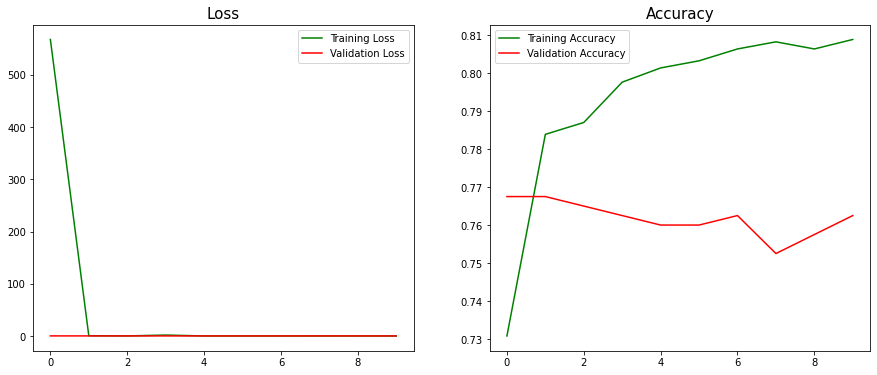

In [49]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

epochs = range(len(loss))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label = "Training Loss", color='green')
plt.plot(epochs, val_loss, label = "Validation Loss", color='red')
plt.legend()
plt.title("Loss", fontsize=15)

plt.subplot(1,2,2)
plt.plot(epochs, accuracy, label = "Training Accuracy", color='green')
plt.plot(epochs, val_accuracy, label = "Validation Accuracy", color='red')
plt.legend()
plt.title("Accuracy", fontsize=15)
plt.show();

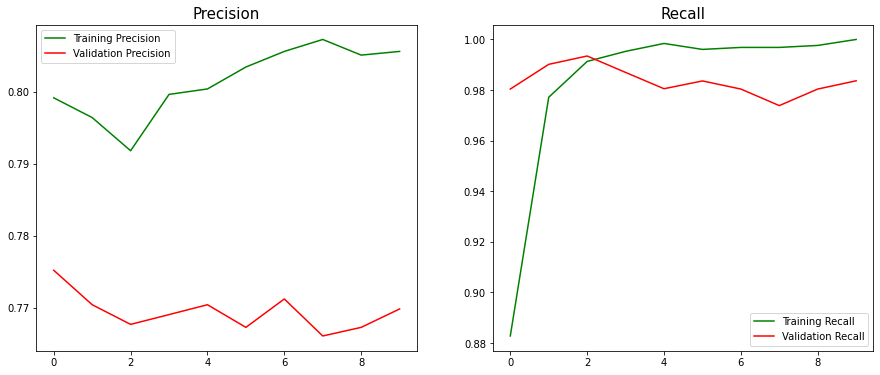

In [52]:
precision = history.history["precision_1"]
recall = history.history["recall_1"]
val_precision = history.history["val_precision_1"]
val_recall = history.history["val_recall_1"]

epochs = range(len(loss))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epochs, precision, label = "Training Precision", color='green')
plt.plot(epochs, val_precision, label = "Validation Precision", color='red')
plt.legend()
plt.title("Precision", fontsize=15)

plt.subplot(1,2,2)
plt.plot(epochs, recall, label = "Training Recall", color='green')
plt.plot(epochs, val_recall, label = "Validation Recall", color='red')
plt.legend()
plt.title("Recall", fontsize=15)
plt.show();

In [53]:
evaluation_result = model.evaluate(test_gen)
evaluation_result

21/21 [==============================] - 128s 6s/step - loss: 0.6217 - accuracy: 0.7635 - precision_1: 0.7708 - recall_1: 0.9839


[0.6216758489608765,
 0.7635468244552612,
 0.7707808613777161,
 0.9839228391647339]

In [54]:
predgen = model.predict_generator(test_gen, steps=len(test_gen))
predgen
test_gen.labels

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,


In [55]:
predgen

array([[0.64220935],
       [0.64220935],
       [0.64220935],
       [0.01016786],
       [0.64220935],
       [0.64220935],
       [0.0047818 ],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.6225946 ],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.75250524],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.0692732 ],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.9996716 ],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.64220935],
       [0.5766417 ],
       [0.64220935],
       [0.64220935],
       [0.642

In [56]:
preds_ = np.ravel(np.round(predgen)).astype(int)
preds_

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [59]:
print(confusion_matrix(test_gen.classes, preds_))
print(confusion_matrix(test_gen.labels, preds_))

[[  3  92]
 [  6 305]]
[[  3  92]
 [  6 305]]


In [60]:
class_names = ["No Pneumothrax", "Pneumothrax"]
print(classification_report(test_gen.classes, preds_, target_names = class_names))

                precision    recall  f1-score   support

No Pneumothrax       0.33      0.03      0.06        95
   Pneumothrax       0.77      0.98      0.86       311

      accuracy                           0.76       406
     macro avg       0.55      0.51      0.46       406
  weighted avg       0.67      0.76      0.67       406



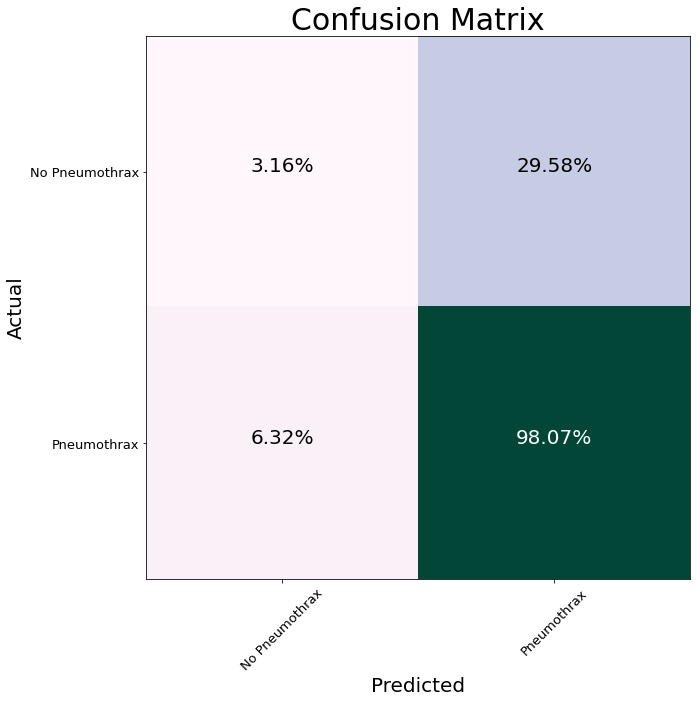

In [65]:
cm = confusion_matrix(test_gen.labels, preds_)
cm = cm.astype(float) / cm.sum(axis=1)[: np.newaxis]
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap="PuBuGn")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45, fontsize=13)
plt.yticks(np.arange(len(class_names)), class_names, fontsize=13)
plt.xlabel("Predicted", fontsize =20)
plt.ylabel("Actual", fontsize =20)
plt.title("Confusion Matrix", fontsize=30)
for i in range(2):
    for j in range(2):
       plt.text(i,j, f"{cm[j,i]*100:.2f}%",  horizontalalignment='center', 
                                fontsize=20,
                                color="white" if cm[j,i]>0.5 else "black")

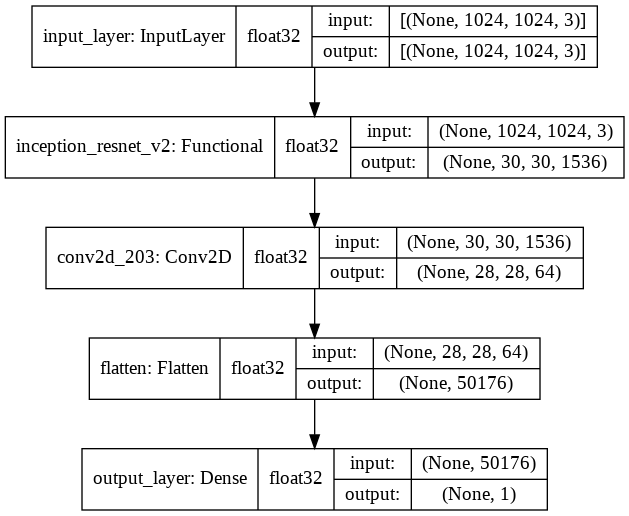

In [62]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [63]:
tf.keras.utils.plot_model(
    base_model, to_file='base_model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.519756 to fit
tcmalloc: large alloc 1351442432 bytes == 0x555c6e450000 @  0x7f9f28da8001 0x7f9f2503f1fa 0x7f9f2503f2ad 0x7f9f261ca6df 0x7f9f266c1261 0x7f9f28b3e468 0x7f9f28b40d53 0x555c6c8be092 0x7f9f284f3bf7 0x555c6c8be12a

